In [263]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import os
import shutil
import textwrap
from datetime import date
from matplotlib.ticker import MaxNLocator
from matplotlib.ticker import ScalarFormatter
from  matplotlib.ticker import FuncFormatter
from pandas import ExcelWriter
from pandas import ExcelFile
from openpyxl import Workbook
from openpyxl.reader.excel import load_workbook
import re 
%matplotlib inline
sns.set_style("darkgrid")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows',None)

In [264]:
data = pd.read_excel('Cardiology Data Set_Analysts.xlsx',sheet_name='Sheet1')

## Get preview of data to see format and sense of the data ##

In [265]:
data.head()

,Discharge Quarter And Year,Operating Physician NPI,Operating Physician,Specialty - Sub-Specialty,Facility Name,# of Cases,Total Charges
0,2018Q2,1275599953,"MENDOZA, CESAR","Internal Medicine, Cardiovascular Disease",JACKSON MEMORIAL HOSPITAL,1,45833
1,2018Q2,1053398362,"GALLARELLO, FRANCESCA","Internal Medicine, Interventional Cardiology",MOUNT SINAI MEDICAL CENTER,1,16866
2,2018Q2,1205933504,"MARTINEZ-CLARK, PEDRO","Internal Medicine, Interventional Cardiology",UNIVERSITY OF MIAMI HOSPITAL AND CLINICS-UHEAL...,1,27435
3,2018Q2,1639272628,"DEAC, DAN","Internal Medicine, Cardiovascular Disease",JFK MEDICAL CENTER,1,72434
4,2018Q2,1083687222,"CHANDY, FRANCIS","Internal Medicine, Cardiovascular Disease",UNIVERSITY OF MIAMI HOSPITAL AND CLINICS-SYLVE...,1,2889


## Make pivot of Total Charges by Quarter and Year to see the relationship over time. Add total rows to view data across specialities 

In [266]:
charge_data = data.groupby(['Discharge Quarter And Year','Specialty - Sub-Specialty'])['Total Charges'].sum().reset_index()

total_charge_data = data.groupby(['Discharge Quarter And Year'])['Total Charges'].sum().reset_index()

total_charge_data['Specialty - Sub-Specialty'] = 'Total'

charge_data = pd.concat([charge_data,total_charge_data],ignore_index=True)

charge_data.head()

,Discharge Quarter And Year,Specialty - Sub-Specialty,Total Charges
0,2017Q4,"Internal Medicine, Cardiovascular Disease",82783235
1,2017Q4,"Internal Medicine, Interventional Cardiology",71533645
2,2018Q1,"Internal Medicine, Cardiovascular Disease",90226606
3,2018Q1,"Internal Medicine, Interventional Cardiology",77404833
4,2018Q2,"Internal Medicine, Cardiovascular Disease",88297665


## Create line shart to visualize data ##

<ipython-input-267-338fbbd6efbe>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ylabels)


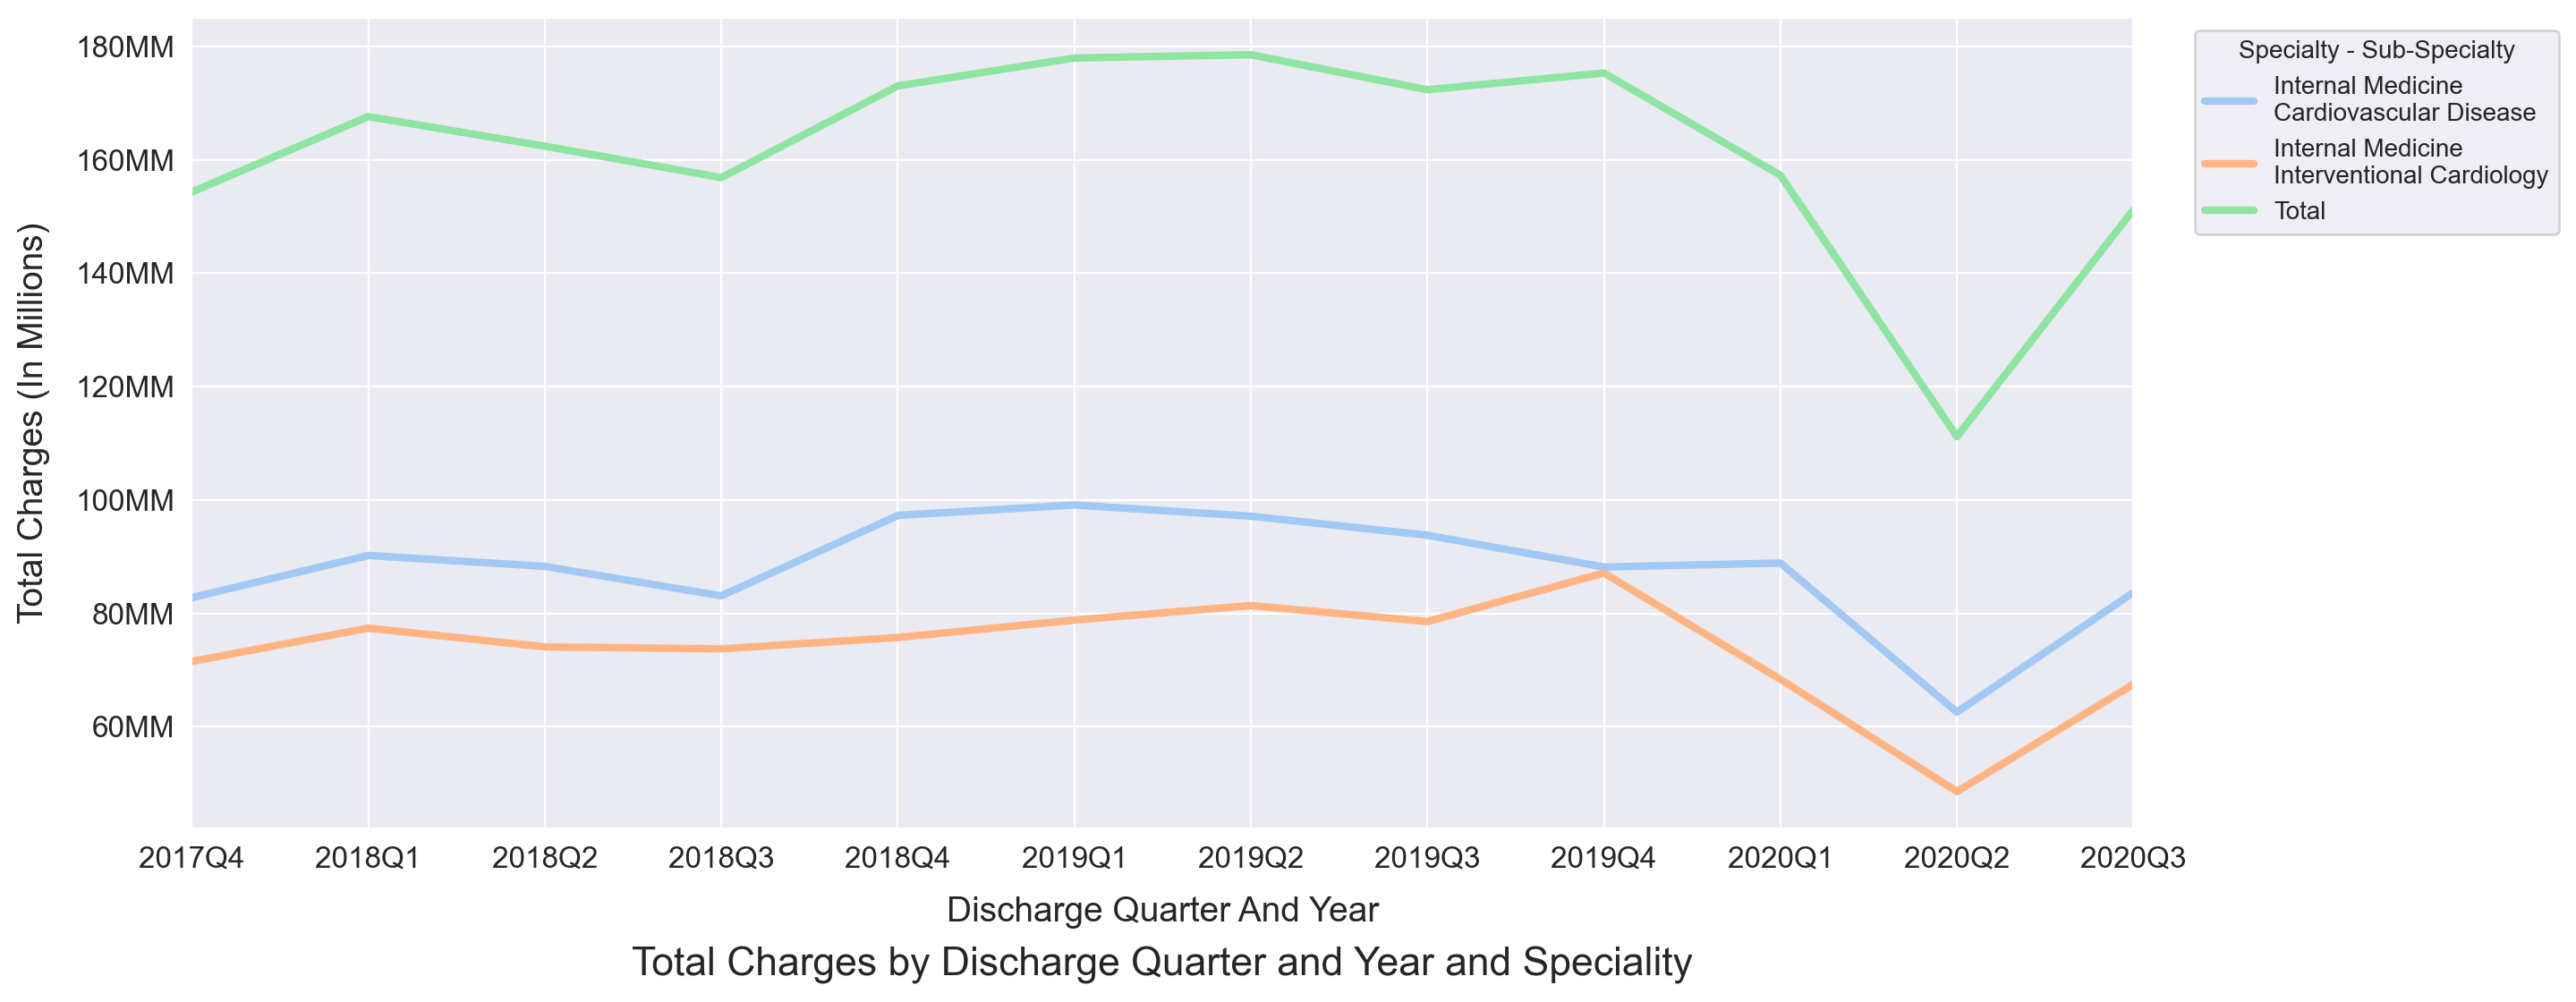

In [267]:
plt.figure(figsize=(14,6),dpi=200)
ax = sns.lineplot(x='Discharge Quarter And Year',y='Total Charges',hue='Specialty - Sub-Specialty',data=charge_data,palette='pastel',linewidth=3)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


ax.set_ylabel('Total Charges (In Millions)',labelpad=10,fontsize=14)
ax.set_xlabel(f'Discharge Quarter And Year',labelpad=9,fontsize=14)

plt.ticklabel_format(style='plain', axis='y')


ylabels = ['{:,.0f}'.format(x) + 'MM' for x in ax.get_yticks()/1000000]
ax.set_yticklabels(ylabels)

plt.legend(bbox_to_anchor=(1.025, 1),title='Specialty - Sub-Specialty',labels=['Internal Medicine\nCardiovascular Disease','Internal Medicine\nInterventional Cardiology','Total'])

ax.margins(x=0)

ax.set_title('Total Charges by Discharge Quarter and Year and Speciality',fontsize=16,y=-.2)

plt.savefig('Chart 1',bbox_inches='tight')



## Create pivot tables of facilities with their total charges and sort from largest to smallest. ##

In [268]:
facility_charges= data.groupby(['Specialty - Sub-Specialty','Facility Name'])['Total Charges'].sum().reset_index().sort_values('Total Charges',ascending=False,ignore_index=True)

facility_charges.head()

,Specialty - Sub-Specialty,Facility Name,Total Charges
0,"Internal Medicine, Cardiovascular Disease",JFK MEDICAL CENTER,182838522
1,"Internal Medicine, Cardiovascular Disease",PALM BEACH GARDENS MEDICAL CENTER,170479585
2,"Internal Medicine, Cardiovascular Disease",DELRAY MEDICAL CENTER,130752411
3,"Internal Medicine, Interventional Cardiology",PALMETTO GENERAL HOSPITAL,83784375
4,"Internal Medicine, Interventional Cardiology",PALM BEACH GARDENS MEDICAL CENTER,79540643


## Create a table that gets the top 5 facilities with the most charges and bottom 5 with the least ##

In [269]:
facility_charges_cd = facility_charges[(facility_charges['Specialty - Sub-Specialty']=='Internal Medicine, Cardiovascular Disease')].head(5).append(facility_charges[(facility_charges['Specialty - Sub-Specialty']=='Internal Medicine, Cardiovascular Disease')].tail(5))

facility_charges_ic = facility_charges[(facility_charges['Specialty - Sub-Specialty']=='Internal Medicine, Interventional Cardiology')].head(5).append(facility_charges[(facility_charges['Specialty - Sub-Specialty']=='Internal Medicine, Interventional Cardiology')].tail(5))

facility_charges_combined = pd.concat([facility_charges_cd,facility_charges_ic],ignore_index=True)

facility_charges_combined.head()

,Specialty - Sub-Specialty,Facility Name,Total Charges
0,"Internal Medicine, Cardiovascular Disease",JFK MEDICAL CENTER,182838522
1,"Internal Medicine, Cardiovascular Disease",PALM BEACH GARDENS MEDICAL CENTER,170479585
2,"Internal Medicine, Cardiovascular Disease",DELRAY MEDICAL CENTER,130752411
3,"Internal Medicine, Cardiovascular Disease",HOLY CROSS HOSPITAL,78833627
4,"Internal Medicine, Cardiovascular Disease",MOUNT SINAI MEDICAL CENTER,57925222


## Create 1x2 graph to show top 5 facilities by speciality ##

<ipython-input-270-345873804a7c>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0].set_yticklabels(labels=axs[0].get_yticklabels(),fontsize=12)
<ipython-input-270-345873804a7c>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_yticklabels(labels=axs[1].get_yticklabels(),fontsize=12)
<ipython-input-270-345873804a7c>:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0].set_yticklabels(ylabels_1)
<ipython-input-270-345873804a7c>:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_yticklabels(ylabels_2)


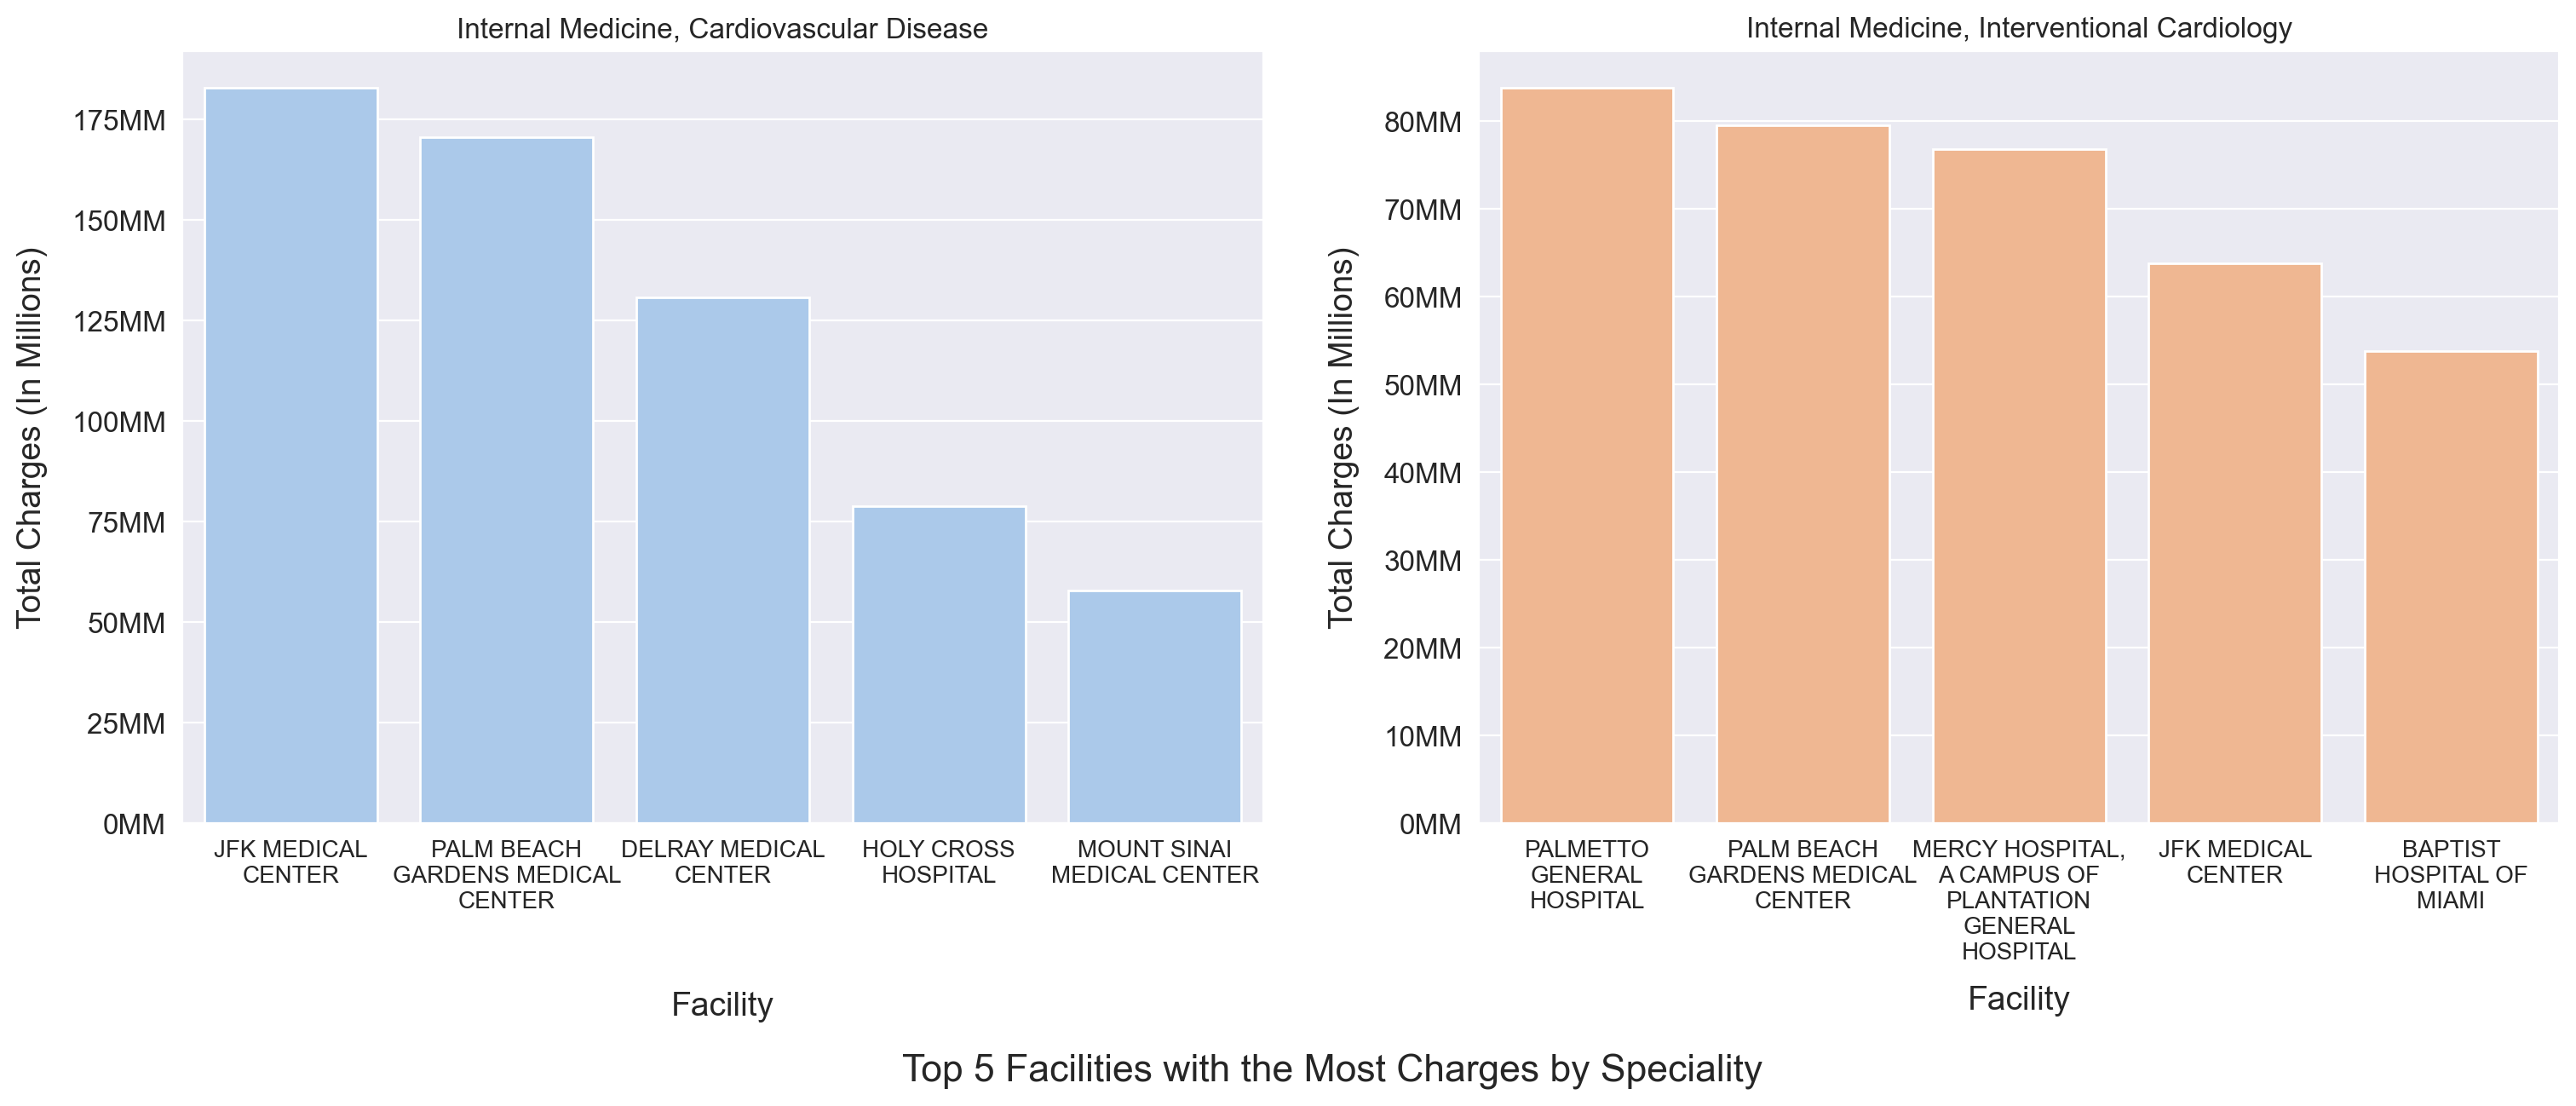

In [270]:
fig, axs = plt.subplots(ncols=2,figsize=(18,6),dpi=200)

sns.barplot(x='Facility Name',y='Total Charges',data=facility_charges_combined[(facility_charges_combined['Specialty - Sub-Specialty']=='Internal Medicine, Cardiovascular Disease')].iloc[:5],ax=axs[0],color=sns.color_palette('pastel')[0])

sns.barplot(x='Facility Name',y='Total Charges',data=facility_charges_combined[(facility_charges_combined['Specialty - Sub-Specialty']=='Internal Medicine, Interventional Cardiology')].iloc[:5],ax=axs[1],color=sns.color_palette('pastel')[1])


axs[0].ticklabel_format(style='plain', axis='y')
axs[1].ticklabel_format(style='plain', axis='y')

axs[0].set_xticklabels(labels=axs[0].get_xticklabels(),fontsize=10)
axs[1].set_xticklabels(labels=axs[1].get_xticklabels(),fontsize=10)

axs[0].set_yticklabels(labels=axs[0].get_yticklabels(),fontsize=12)
axs[1].set_yticklabels(labels=axs[1].get_yticklabels(),fontsize=12)



axs[0].set_ylabel('Total Charges (In Millions)',labelpad=10,fontsize=14)
axs[0].set_xlabel(f'Facility',labelpad=33,fontsize=14)
axs[1].set_ylabel('Total Charges (In Millions)',labelpad=10,fontsize=14)
axs[1].set_xlabel(f'Facility',labelpad=9,fontsize=14)

axs[0].set_title('Internal Medicine, Cardiovascular Disease',fontsize=12)
axs[1].set_title('Internal Medicine, Interventional Cardiology',fontsize=12)

ylabels_1 = ['{:,.0f}'.format(x) + 'MM' for x in axs[0].get_yticks()/1000000]
axs[0].set_yticklabels(ylabels_1)

ylabels_2 = ['{:,.0f}'.format(x) + 'MM' for x in axs[1].get_yticks()/1000000]
axs[1].set_yticklabels(ylabels_2)


max_width_1 = 15
max_width_2 = 15

axs[0].set_xticklabels(textwrap.fill(x.get_text(), max_width_1) for x in axs[0].get_xticklabels())
axs[1].set_xticklabels(textwrap.fill(x.get_text(), max_width_2) for x in axs[1].get_xticklabels())

fig.suptitle('Top 5 Facilities with the Most Charges by Speciality', fontsize=16,y=-.1)

plt.savefig('Chart 2',bbox_inches='tight')

## Create 1x2 graph to show bottom 5 facilities by speciality ##

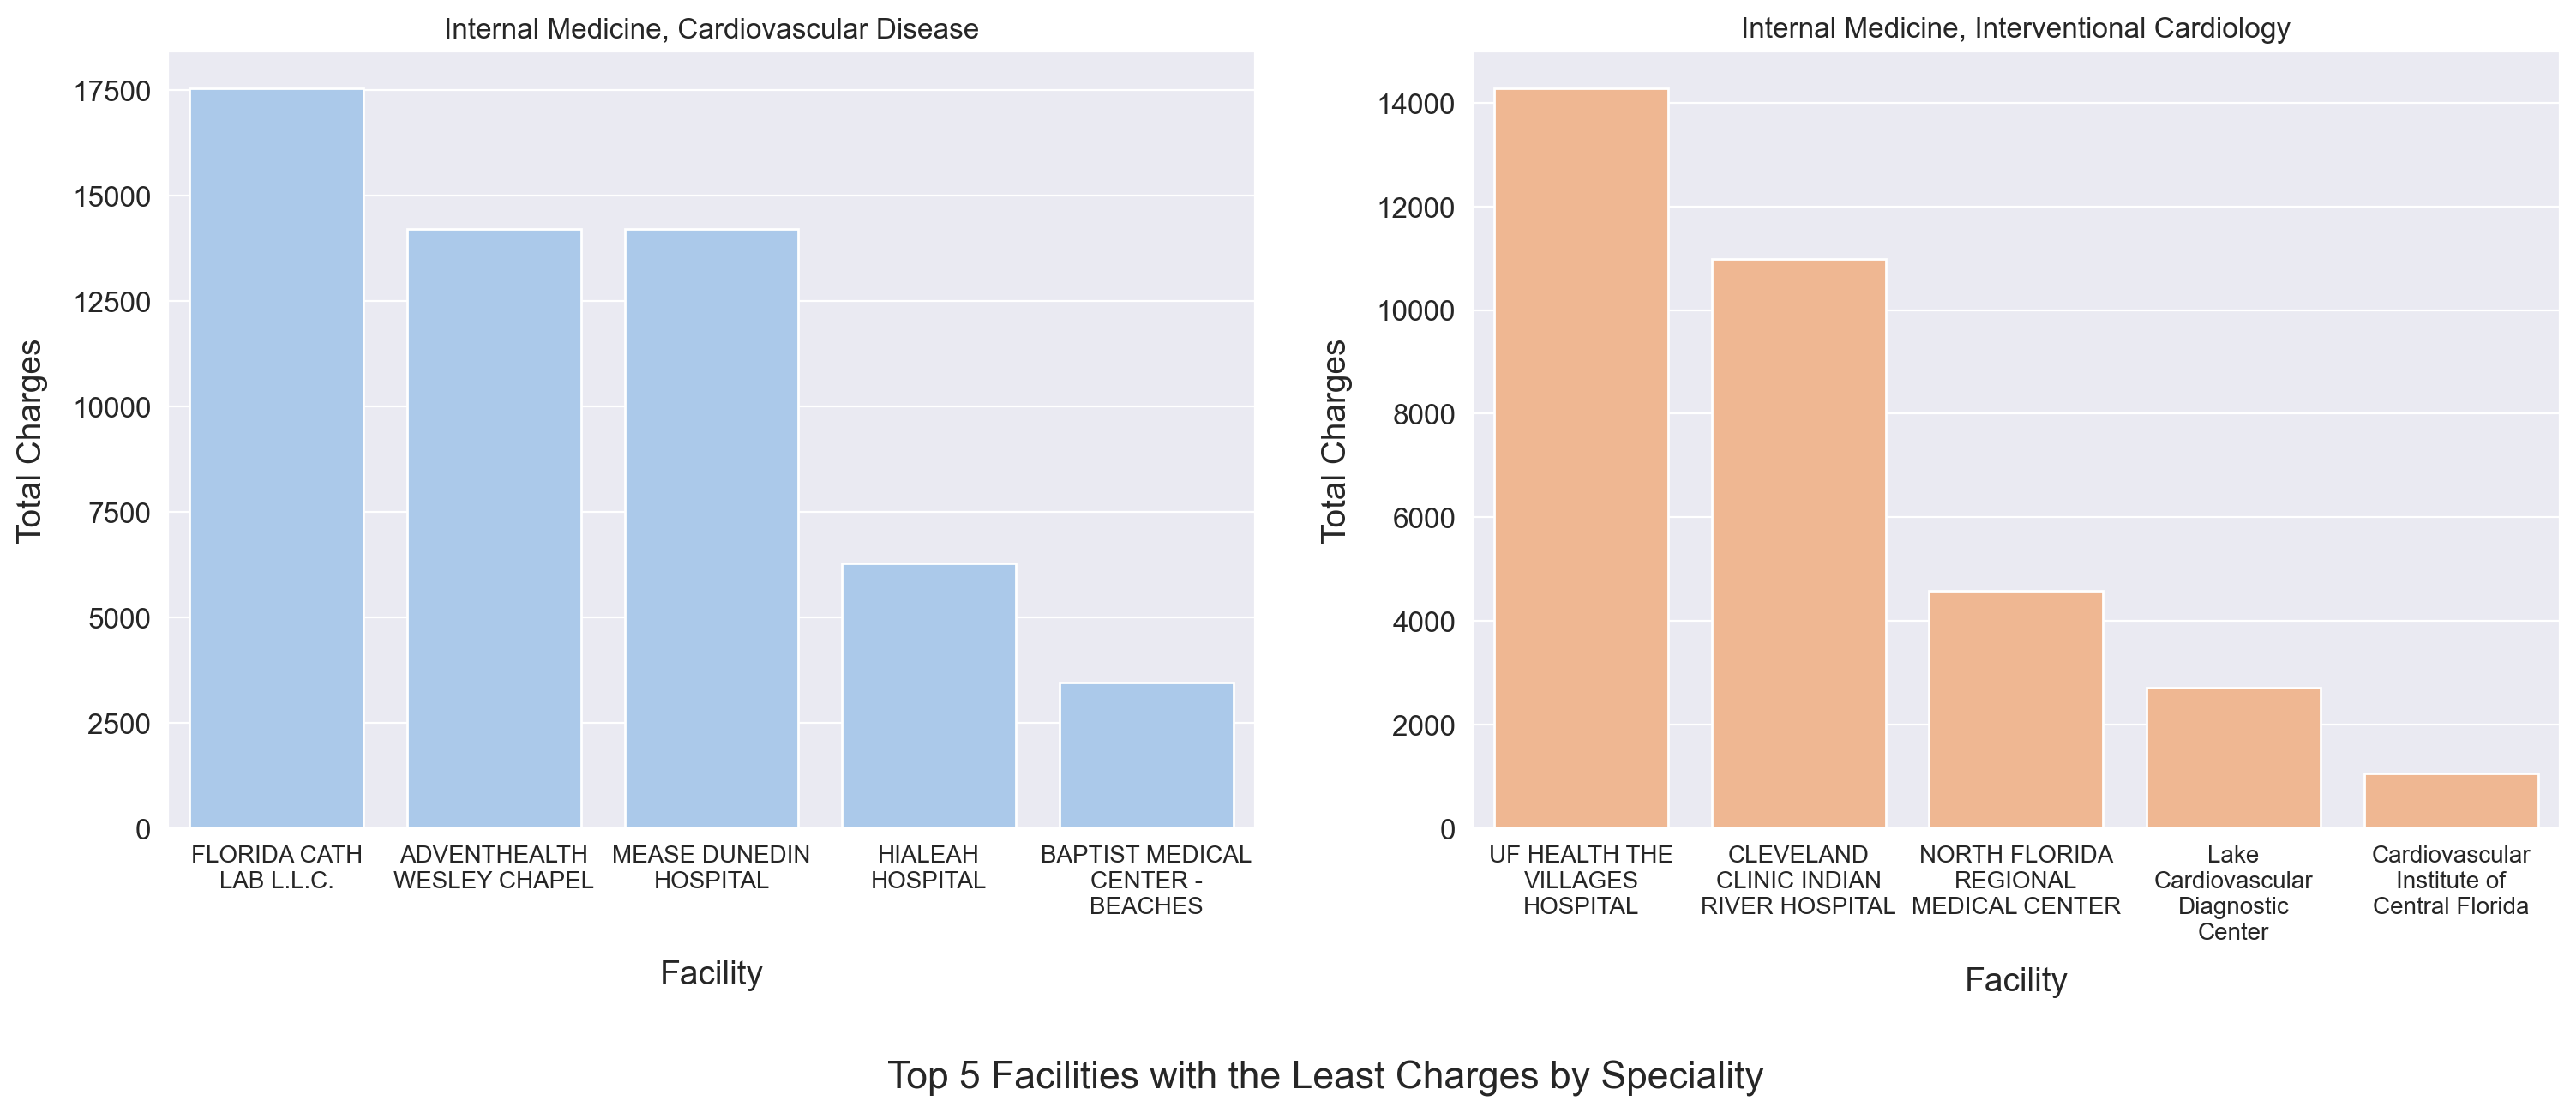

In [271]:
fig, axs = plt.subplots(ncols=2,figsize=(18,6),dpi=200)

sns.barplot(x='Facility Name',y='Total Charges',data=facility_charges_combined[(facility_charges_combined['Specialty - Sub-Specialty']=='Internal Medicine, Cardiovascular Disease')].iloc[-5:],ax=axs[0],color=sns.color_palette('pastel')[0])

sns.barplot(x='Facility Name',y='Total Charges',data=facility_charges_combined[(facility_charges_combined['Specialty - Sub-Specialty']=='Internal Medicine, Interventional Cardiology')].iloc[-5:],ax=axs[1],color=sns.color_palette('pastel')[1])


axs[0].set_xticklabels(labels=axs[0].get_xticklabels(),fontsize=10)
axs[1].set_xticklabels(labels=axs[1].get_xticklabels(),fontsize=10)

for label in axs[0].get_yticklabels():
    label.set_fontsize(12)
for label in axs[1].get_yticklabels():
    label.set_fontsize(12)



axs[0].set_ylabel('Total Charges',labelpad=10,fontsize=14)
axs[0].set_xlabel(f'Facility',labelpad=17,fontsize=14)
axs[1].set_ylabel('Total Charges',labelpad=10,fontsize=14)
axs[1].set_xlabel(f'Facility',labelpad=9,fontsize=14)

axs[0].set_title('Internal Medicine, Cardiovascular Disease',fontsize=12)
axs[1].set_title('Internal Medicine, Interventional Cardiology',fontsize=12)

max_width_1 = 15
max_width_2 = 15

axs[0].set_xticklabels(textwrap.fill(x.get_text(), max_width_1) for x in axs[0].get_xticklabels())
axs[1].set_xticklabels(textwrap.fill(x.get_text(), max_width_2) for x in axs[1].get_xticklabels())


fig.suptitle('Top 5 Facilities with the Least Charges by Speciality', fontsize=16,y=-.1)

plt.savefig('Chart 3',bbox_inches='tight')

## Produce same data as above but by looking at cases instead of charges ##

In [272]:
cases_data = data.groupby(['Discharge Quarter And Year','Specialty - Sub-Specialty'])['# of Cases'].sum().reset_index()

total_cases_data = data.groupby(['Discharge Quarter And Year'])['# of Cases'].sum().reset_index()

total_cases_data['Specialty - Sub-Specialty'] = 'Total'

cases_data = pd.concat([cases_data,total_cases_data],ignore_index=True)

cases_data.head()

,Discharge Quarter And Year,Specialty - Sub-Specialty,# of Cases
0,2017Q4,"Internal Medicine, Cardiovascular Disease",1996
1,2017Q4,"Internal Medicine, Interventional Cardiology",1673
2,2018Q1,"Internal Medicine, Cardiovascular Disease",2115
3,2018Q1,"Internal Medicine, Interventional Cardiology",1708
4,2018Q2,"Internal Medicine, Cardiovascular Disease",2117


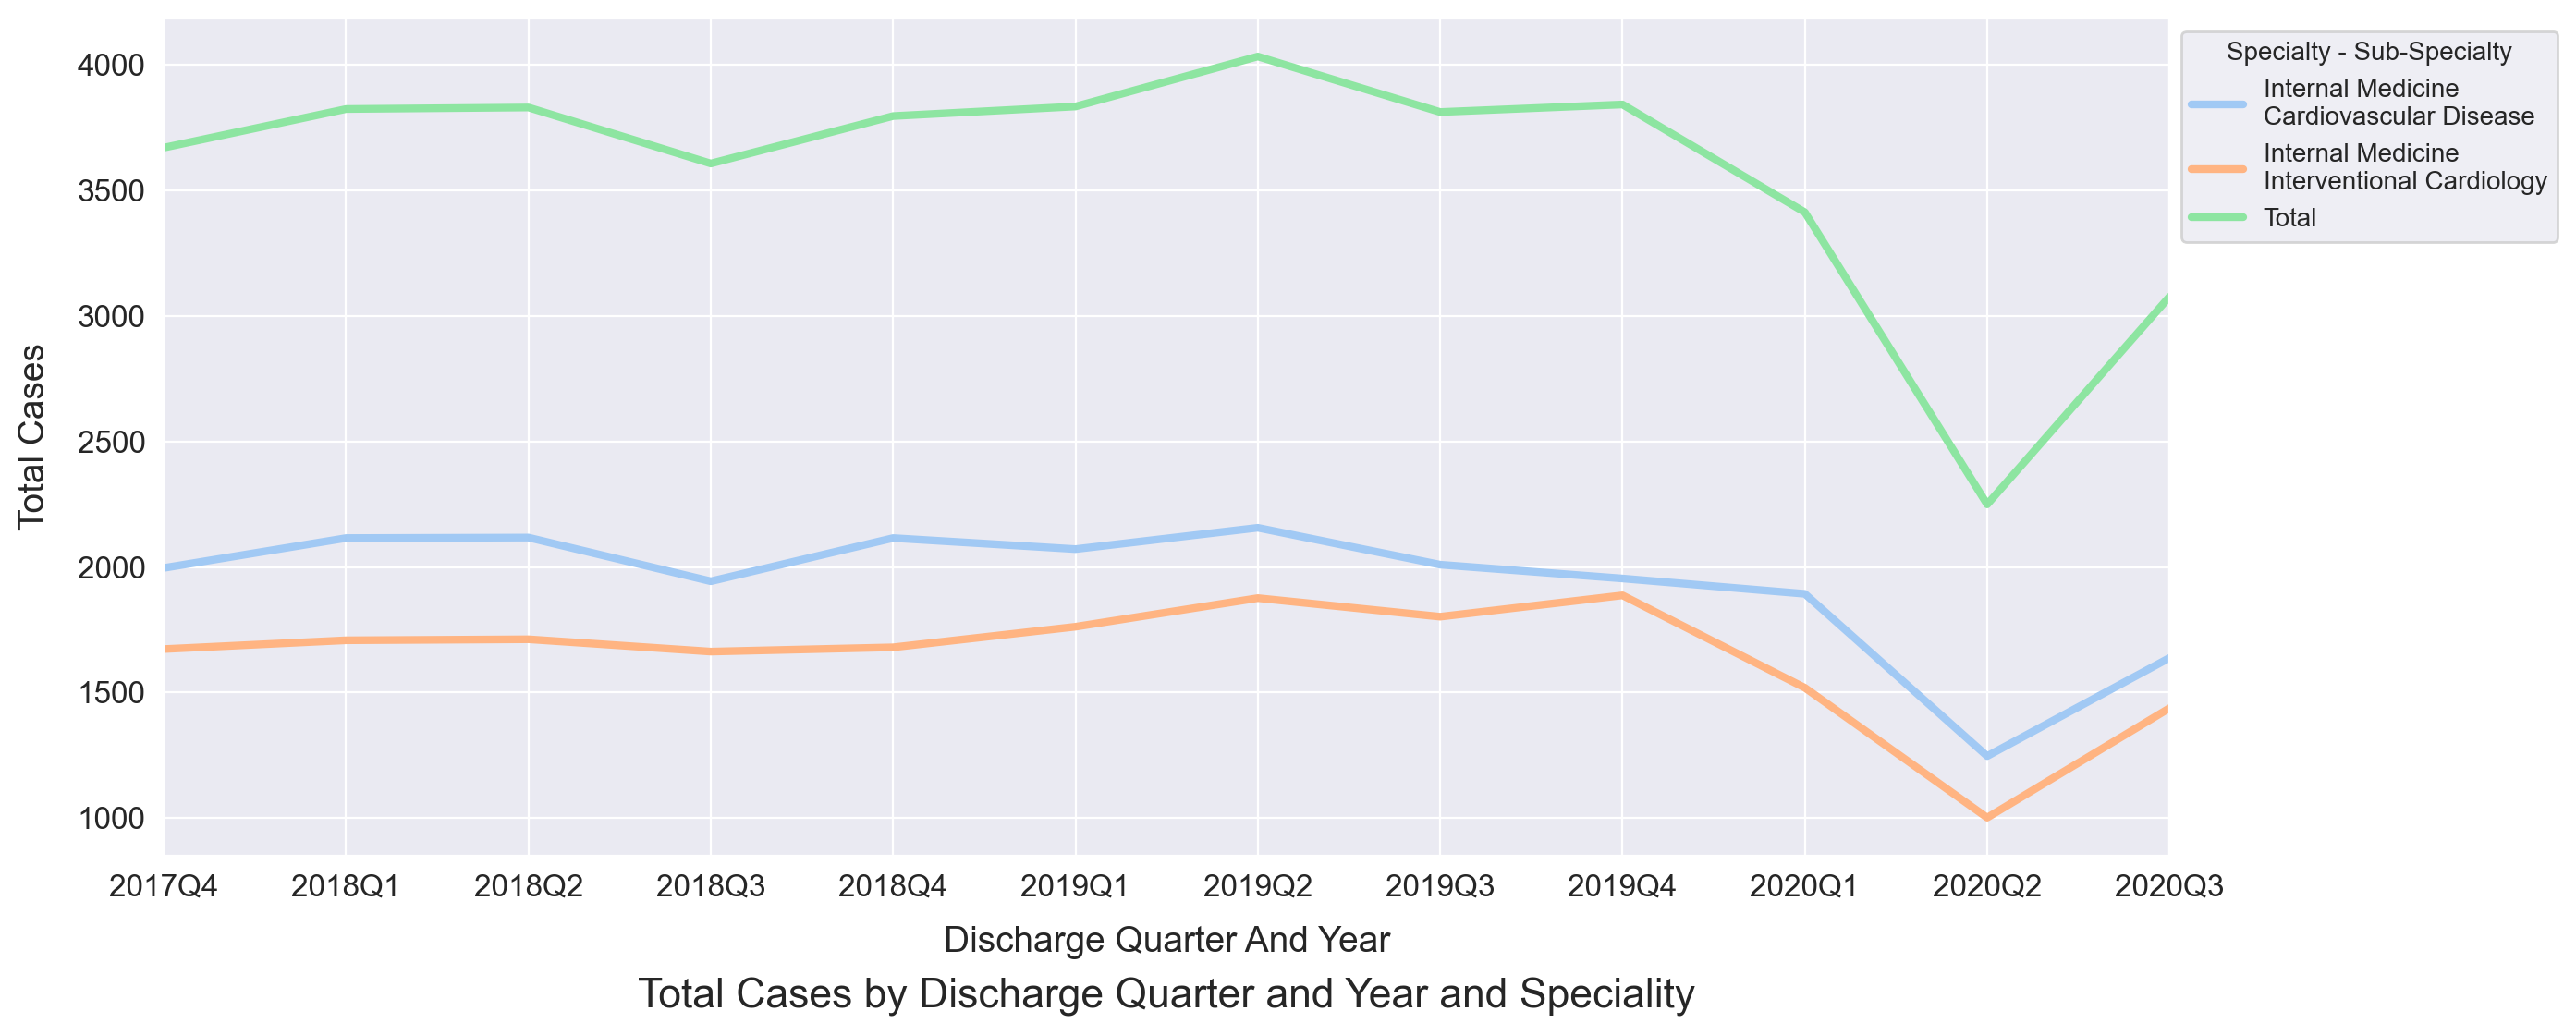

In [273]:
plt.figure(figsize=(14,6),dpi=200)
ax = sns.lineplot(x='Discharge Quarter And Year',y='# of Cases',hue='Specialty - Sub-Specialty',data=cases_data,palette='pastel',linewidth=3)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


ax.set_ylabel('Total Cases',labelpad=10,fontsize=14)
ax.set_xlabel(f'Discharge Quarter And Year',labelpad=9,fontsize=14)


plt.legend(bbox_to_anchor=(1.2, 1),title='Specialty - Sub-Specialty',labels=['Internal Medicine\nCardiovascular Disease','Internal Medicine\nInterventional Cardiology','Total'])

ax.margins(x=0)

ax.set_title('Total Cases by Discharge Quarter and Year and Speciality',fontsize=16,y=-.2)

plt.savefig('Chart 4',bbox_inches='tight')



## To look at data based on charges per number of cases, create a table that takes the sum of cases and charges and divide them ##

In [274]:
cc = pd.merge(charge_data,cases_data,on=['Discharge Quarter And Year','Specialty - Sub-Specialty'])

cc['Charges_p_Case'] = round(cc['Total Charges'] / cc['# of Cases'])

cc.head()

,Discharge Quarter And Year,Specialty - Sub-Specialty,Total Charges,# of Cases,Charges_p_Case
0,2017Q4,"Internal Medicine, Cardiovascular Disease",82783235,1996,41475.0
1,2017Q4,"Internal Medicine, Interventional Cardiology",71533645,1673,42758.0
2,2018Q1,"Internal Medicine, Cardiovascular Disease",90226606,2115,42660.0
3,2018Q1,"Internal Medicine, Interventional Cardiology",77404833,1708,45319.0
4,2018Q2,"Internal Medicine, Cardiovascular Disease",88297665,2117,41709.0


## Create lineplot of total charges per case ##

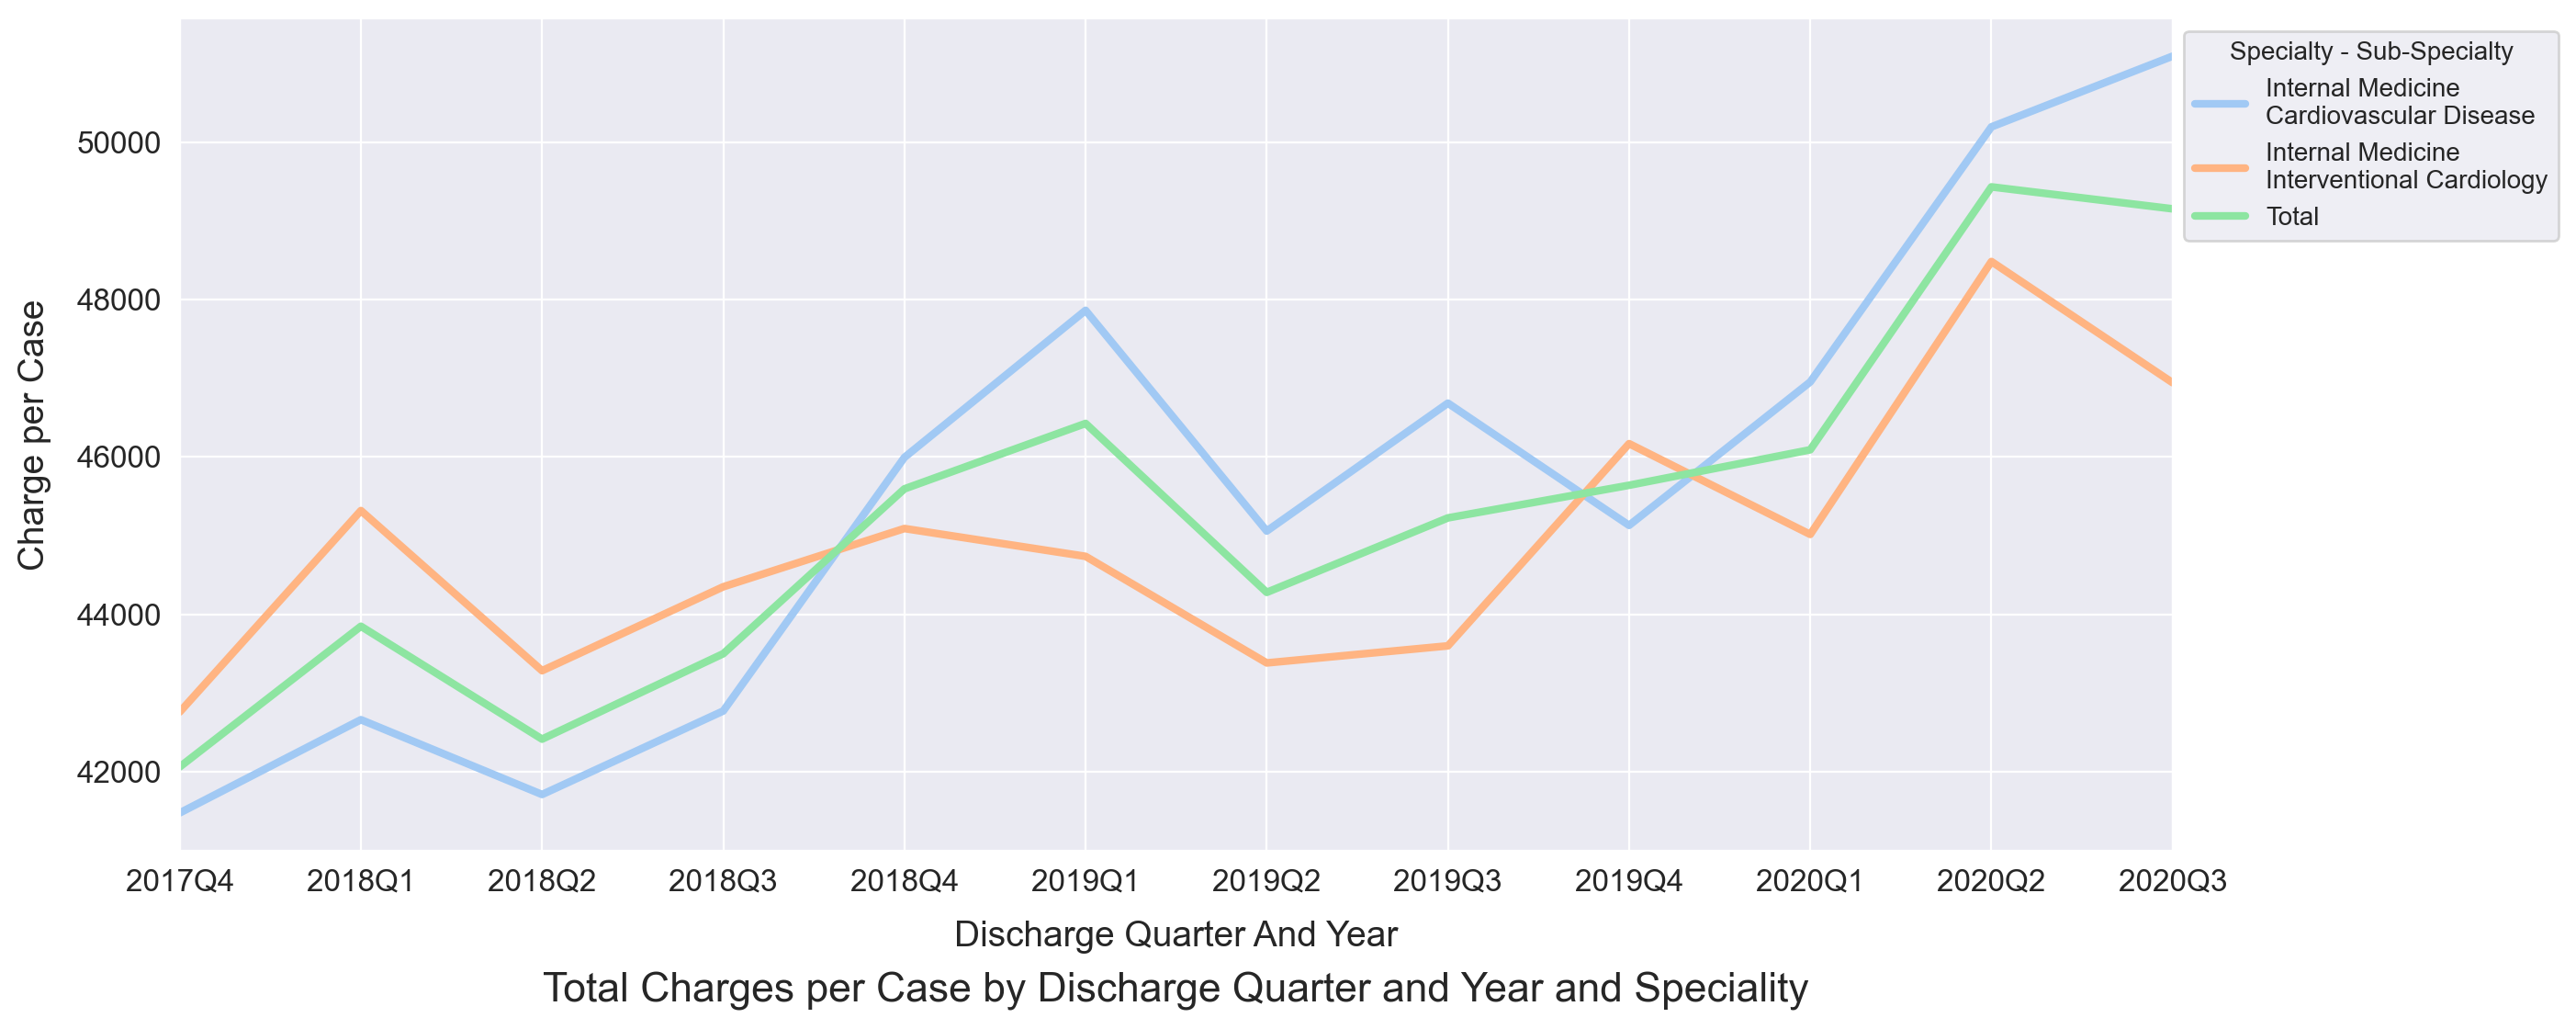

In [283]:
plt.figure(figsize=(14,6),dpi=200)
ax = sns.lineplot(x='Discharge Quarter And Year',y='Charges_p_Case',hue='Specialty - Sub-Specialty',data=cc,palette='pastel',linewidth=3)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


ax.set_ylabel('Charge per Case',labelpad=10,fontsize=14)
ax.set_xlabel(f'Discharge Quarter And Year',labelpad=9,fontsize=14)


plt.legend(bbox_to_anchor=(1.2, 1),title='Specialty - Sub-Specialty',labels=['Internal Medicine\nCardiovascular Disease','Internal Medicine\nInterventional Cardiology','Total'])

ax.margins(x=0)

ax.set_title('Total Charges per Case by Discharge Quarter and Year and Speciality',fontsize=16,y=-.2)

plt.savefig('Chart 5',bbox_inches='tight')



## Produce same tables and graphs but use Charges per Case as the metric ##

In [276]:
facility_cases= data.groupby(['Specialty - Sub-Specialty','Facility Name'])['# of Cases'].sum().reset_index().sort_values('# of Cases',ascending=False,ignore_index=True)

facility_cc = pd.merge(facility_charges,facility_cases,on=['Specialty - Sub-Specialty','Facility Name'])

facility_cc['Charges_p_Case'] = round(facility_cc['Total Charges'] / facility_cc['# of Cases'])

facility_cc.sort_values('Charges_p_Case',ascending=False,inplace=True,ignore_index=True)

In [277]:
facility_cc.head()

,Specialty - Sub-Specialty,Facility Name,Total Charges,# of Cases,Charges_p_Case
0,"Internal Medicine, Cardiovascular Disease",MEMORIAL HOSPITAL OF TAMPA,191980,1,191980.0
1,"Internal Medicine, Interventional Cardiology",JFK MEDICAL CENTER NORTH CAMPUS,333718,2,166859.0
2,"Internal Medicine, Interventional Cardiology",JFK MEDICAL CENTER,63775389,566,112677.0
3,"Internal Medicine, Interventional Cardiology",ADVENTHEALTH TAMPA,102369,1,102369.0
4,"Internal Medicine, Cardiovascular Disease",MEDICAL CENTER OF TRINITY,98940,1,98940.0


In [278]:
facility_cc_cd = facility_cc[(facility_cc['Specialty - Sub-Specialty']=='Internal Medicine, Cardiovascular Disease')].head(5).append(facility_cc[(facility_cc['Specialty - Sub-Specialty']=='Internal Medicine, Cardiovascular Disease')].tail(5))

facility_cc_ic = facility_cc[(facility_cc['Specialty - Sub-Specialty']=='Internal Medicine, Interventional Cardiology')].head(5).append(facility_cc[(facility_cc['Specialty - Sub-Specialty']=='Internal Medicine, Interventional Cardiology')].tail(5))

facility_cc_combined = pd.concat([facility_cc_cd,facility_cc_ic],ignore_index=True)

facility_cc_combined.head()

,Specialty - Sub-Specialty,Facility Name,Total Charges,# of Cases,Charges_p_Case
0,"Internal Medicine, Cardiovascular Disease",MEMORIAL HOSPITAL OF TAMPA,191980,1,191980.0
1,"Internal Medicine, Cardiovascular Disease",MEDICAL CENTER OF TRINITY,98940,1,98940.0
2,"Internal Medicine, Cardiovascular Disease",REGIONAL MEDICAL CENTER BAYONET POINT,94452,1,94452.0
3,"Internal Medicine, Cardiovascular Disease",BRANDON REGIONAL HOSPITAL,182534,2,91267.0
4,"Internal Medicine, Cardiovascular Disease",ASCENSION ST VINCENT'S CLAY COUNTY,90955,1,90955.0


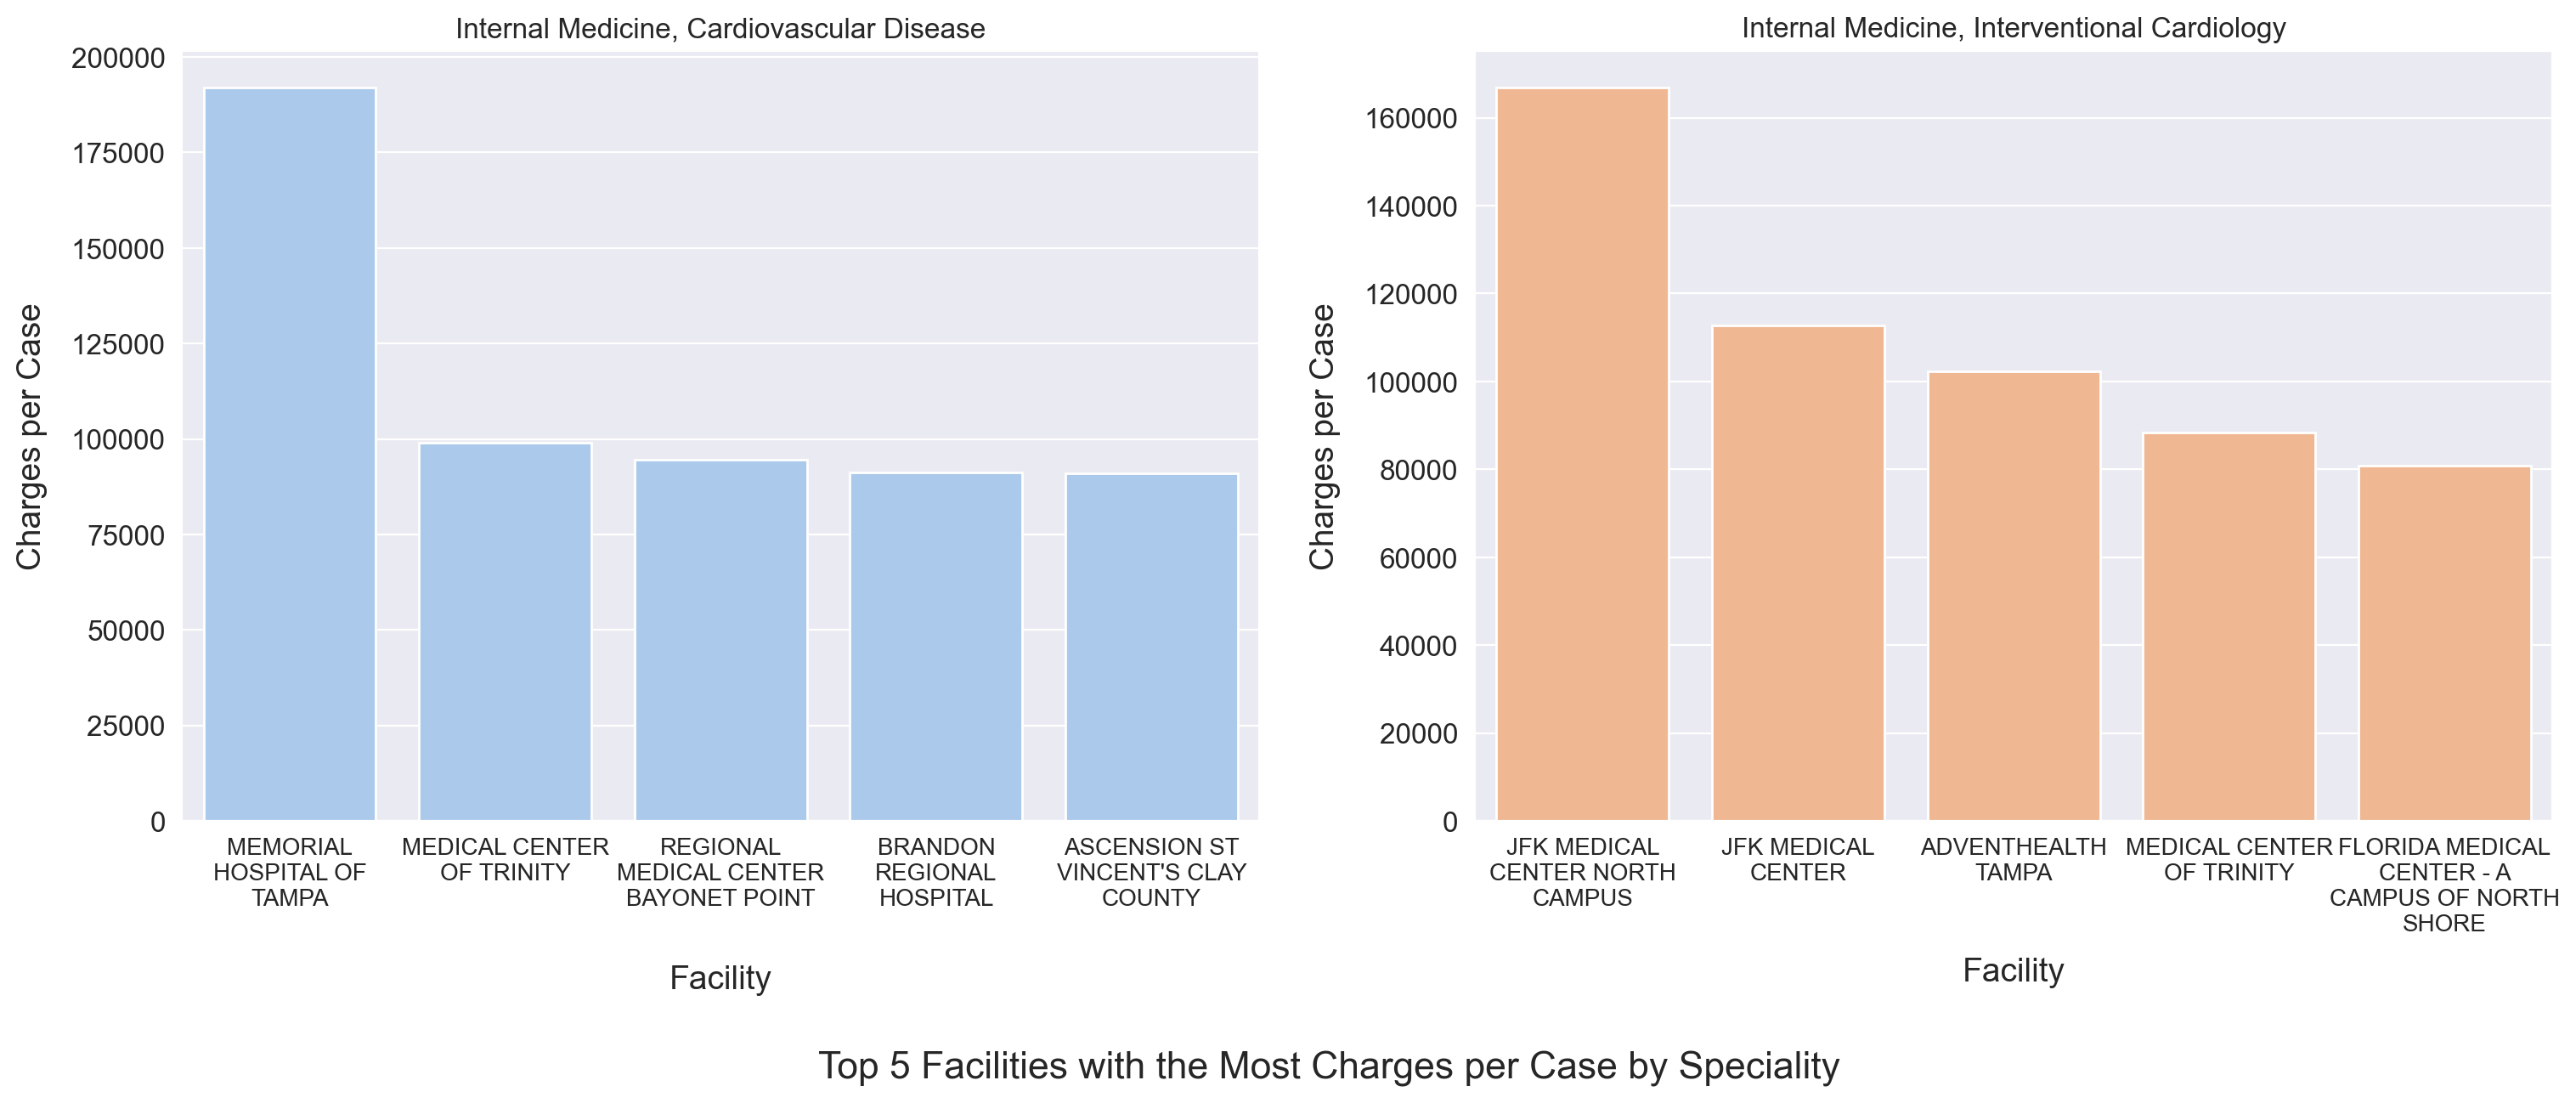

In [279]:
fig, axs = plt.subplots(ncols=2,figsize=(18,6),dpi=200)

sns.barplot(x='Facility Name',y='Charges_p_Case',data=facility_cc_combined[(facility_cc_combined['Specialty - Sub-Specialty']=='Internal Medicine, Cardiovascular Disease')].iloc[:5],ax=axs[0],color=sns.color_palette('pastel')[0])

sns.barplot(x='Facility Name',y='Charges_p_Case',data=facility_cc_combined[(facility_cc_combined['Specialty - Sub-Specialty']=='Internal Medicine, Interventional Cardiology')].iloc[:5],ax=axs[1],color=sns.color_palette('pastel')[1])



axs[0].set_xticklabels(labels=axs[0].get_xticklabels(),fontsize=10)
axs[1].set_xticklabels(labels=axs[1].get_xticklabels(),fontsize=10)

for label in axs[0].get_yticklabels():
    label.set_fontsize(12)
for label in axs[1].get_yticklabels():
    label.set_fontsize(12)



axs[0].set_ylabel('Charges per Case',labelpad=10,fontsize=14)
axs[0].set_xlabel(f'Facility',labelpad=23,fontsize=14)
axs[1].set_ylabel('Charges per Case',labelpad=10,fontsize=14)
axs[1].set_xlabel(f'Facility',labelpad=9,fontsize=14)

axs[0].set_title('Internal Medicine, Cardiovascular Disease',fontsize=12)
axs[1].set_title('Internal Medicine, Interventional Cardiology',fontsize=12)



max_width_1 = 15
max_width_2 = 15

axs[0].set_xticklabels(textwrap.fill(x.get_text(), max_width_1) for x in axs[0].get_xticklabels())
axs[1].set_xticklabels(textwrap.fill(x.get_text(), max_width_2) for x in axs[1].get_xticklabels())

fig.suptitle('Top 5 Facilities with the Most Charges per Case by Speciality', fontsize=16,y=-.1)

plt.savefig('Chart 6',bbox_inches='tight')

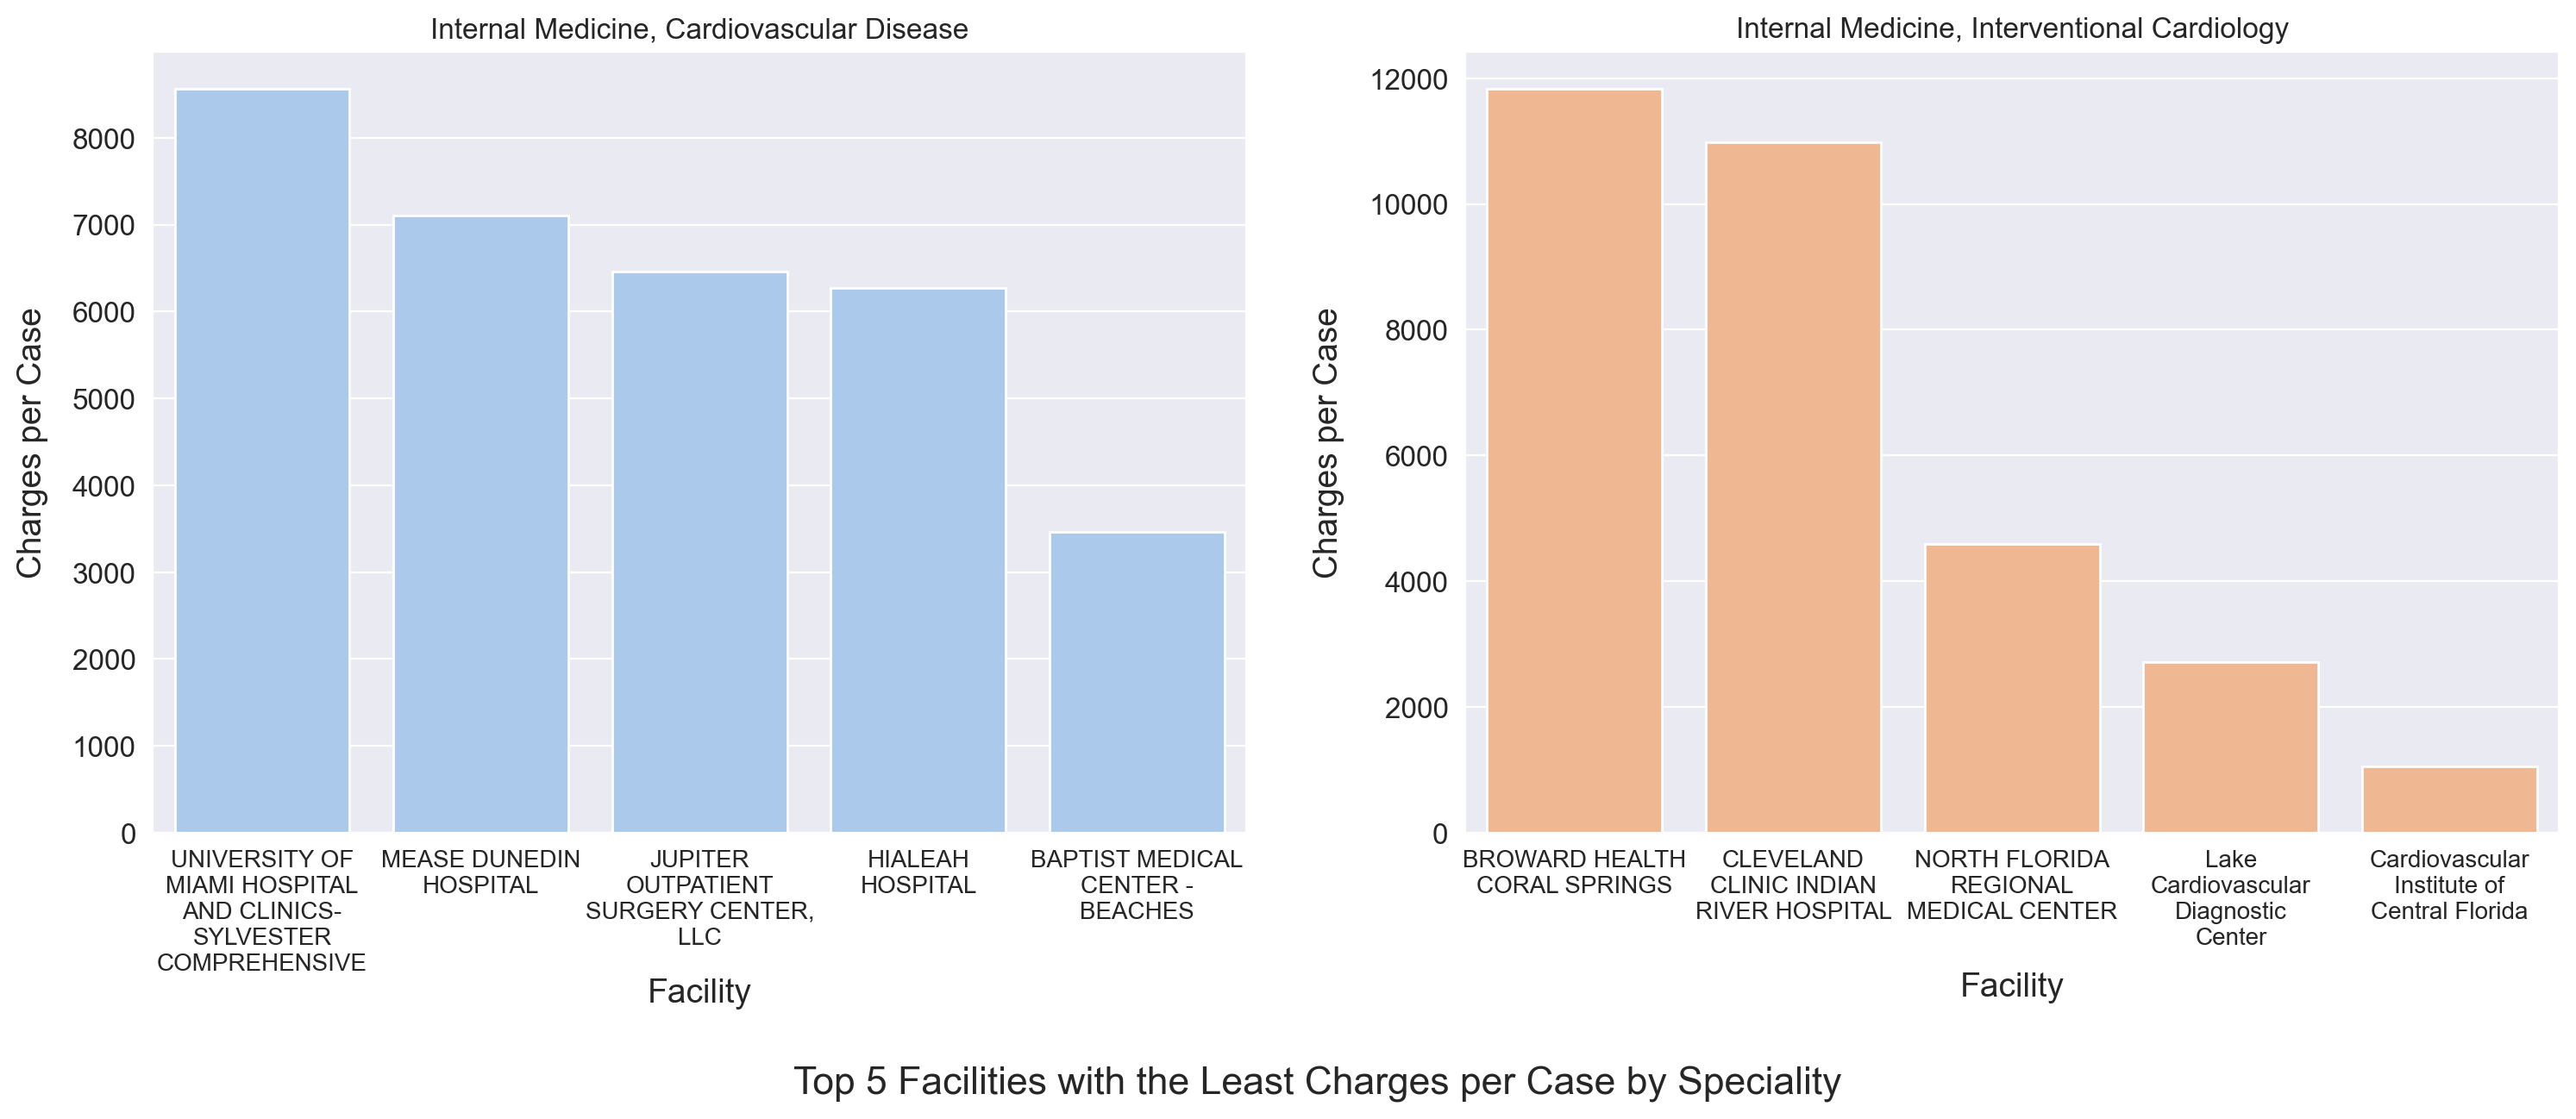

In [280]:
fig, axs = plt.subplots(ncols=2,figsize=(18,6),dpi=200)

sns.barplot(x='Facility Name',y='Charges_p_Case',data=facility_cc_combined[(facility_cc_combined['Specialty - Sub-Specialty']=='Internal Medicine, Cardiovascular Disease')].iloc[-5:],ax=axs[0],color=sns.color_palette('pastel')[0])

sns.barplot(x='Facility Name',y='Charges_p_Case',data=facility_cc_combined[(facility_cc_combined['Specialty - Sub-Specialty']=='Internal Medicine, Interventional Cardiology')].iloc[-5:],ax=axs[1],color=sns.color_palette('pastel')[1])



axs[0].set_xticklabels(labels=axs[0].get_xticklabels(),fontsize=10)
axs[1].set_xticklabels(labels=axs[1].get_xticklabels(),fontsize=10)

for label in axs[0].get_yticklabels():
    label.set_fontsize(12)
for label in axs[1].get_yticklabels():
    label.set_fontsize(12)



axs[0].set_ylabel('Charges per Case',labelpad=10,fontsize=14)
axs[0].set_xlabel(f'Facility',labelpad=1,fontsize=14)
axs[1].set_ylabel('Charges per Case',labelpad=10,fontsize=14)
axs[1].set_xlabel(f'Facility',labelpad=9,fontsize=14)

axs[0].set_title('Internal Medicine, Cardiovascular Disease',fontsize=12)
axs[1].set_title('Internal Medicine, Interventional Cardiology',fontsize=12)



max_width_1 = 15
max_width_2 = 15

axs[0].set_xticklabels(textwrap.fill(x.get_text(), max_width_1) for x in axs[0].get_xticklabels())
axs[1].set_xticklabels(textwrap.fill(x.get_text(), max_width_2) for x in axs[1].get_xticklabels())

fig.suptitle('Top 5 Facilities with the Least Charges per Case by Speciality', fontsize=16,y=-.1)

plt.savefig('Chart 7',bbox_inches='tight')

## Create table of Physicians with the most charges per case ##

In [281]:
cc_op =  data.groupby(['Specialty - Sub-Specialty','Operating Physician']).agg({'# of Cases':['sum'],'Total Charges':['sum']})

cc_op = cc_op.droplevel(level=1,axis=1).reset_index()

cc_op['Charges_p_Case'] = round(cc_op['Total Charges'] / cc_op['# of Cases'])

cc_op.sort_values('Charges_p_Case',ascending=False,inplace=True,ignore_index=True)

## Create tables of Physicians with the most charges and cases overall##

In [282]:
cc_op_c = cc_op.sort_values('Total Charges',ascending=False,ignore_index=True)

cc_op_ca = cc_op.sort_values('# of Cases',ascending=False,ignore_index=True)

In [289]:
cc_op.to_excel('top op.xlsx',index=False)
writer = pd.ExcelWriter('top op.xlsx',mode='a',engine='openpyxl')
cc_op_c.to_excel(writer,sheet_name='topcharges',index=False)
cc_op_ca.to_excel(writer,sheet_name='topcases',index=False)
writer.save()

## Quick descriptive stats ##

In [259]:
ufn = data['Facility Name'].nunique()
print(f'Number of Unique Facilities: {ufn}') 
ufop = data['Operating Physician NPI'].nunique()
print(f'Number of Unique Physicians: {ufop}') 
print('Total Charges is: ' +str(cc[(cc['Specialty - Sub-Specialty']=='Total')]['Total Charges'].sum()))
print('Total Cases is: ' +str(cc[(cc['Specialty - Sub-Specialty']=='Total')]['# of Cases'].sum()))

avg_charg = round(cc[(cc['Specialty - Sub-Specialty']=='Total')]['Total Charges'].sum()/cc[(cc['Specialty - Sub-Specialty']=='Total')]['# of Cases'].sum())
print(f'Average number of charges is: {avg_charg}')

Number of Unique Facilities: 106
Number of Unique Physicians: 565
Total Charges is: 1938032765
Total Cases is: 42976
Average number of charges is: 45096


In [260]:
tables = [charge_data,facility_charges,facility_charges_combined,cases_data,cc,facility_cc,facility_cc_combined,cc_op]

In [261]:
writer = pd.ExcelWriter('Cardiology Data Set_Analysts.xlsx',mode='a',engine='openpyxl')

In [262]:
for count,table in enumerate(tables,start=1):
    table.to_excel(writer,sheet_name=f'Table {count}',index=False)
writer.save()